# SI 305 Fall 2024 Final Project Analysis - RQ1

***RQ1: How have employment levels and union membership rates in the healthcare industry changed pre and post COVID-19 pandemic from 2017-2023?***

## Import Libraries

In [6]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

## Load Data and Healthcare Section Extraction

In [7]:
# Function to load data from a file and add the Year column
def load_data_with_year(url, year):
    df = pd.read_excel(url, skiprows=2)
    df['Year'] = year
    return df

In [8]:
# Function to extract the section of a DataFrame specific to "HEALTH CARE & SOCIAL ASSISTANCE"
def extract_healthcare_section(df):
    # Initialize an empty list to store rows that belong to the healthcare section
    healthcare_section = []
    
    # Flag to indicate whether we are within the healthcare section
    in_section = False
    
    # Iterate through each row in the DataFrame
    for i, row in df.iterrows():
        # Get the value of the 'Industry' column for the current row
        industry = row['Industry']
        
        # Check if the current row marks the beginning of the healthcare section
        if industry == "HEALTH CARE & SOCIAL ASSISTANCE":
            # If yes, set the flag to True to start collecting rows
            in_section = True
            continue
        
        # If we are within the healthcare section
        if in_section:
            # Check if the current row marks the end of the healthcare section
            if industry.isupper() and industry != "HEALTH CARE & SOCIAL ASSISTANCE":
                # If yes, break the loop to stop collecting rows
                break
            # Append the current row to the healthcare_section list
            healthcare_section.append(row)
    
    # Convert the list of rows into a DataFrame
    healthcare_df = pd.DataFrame(healthcare_section)
    return healthcare_df

In [9]:
# load the data and concatenate date
df_2017 = load_data_with_year('https://unionstats.com/ind/xls/ind_2017.xlsx', 2017)
df_2018 = load_data_with_year('https://unionstats.com/ind/xls/ind_2018.xlsx', 2018)
df_2019 = load_data_with_year('https://unionstats.com/ind/xls/ind_2019.xlsx', 2019)
df_2020 = load_data_with_year('https://unionstats.com/ind/xls/ind_2020.xlsx', 2020)
df_2021 = load_data_with_year('https://unionstats.com/ind/xls/ind_2021.xlsx', 2021)
df_2022 = load_data_with_year('https://unionstats.com/ind/xls/ind_2022.xlsx', 2022)
df_2023 = load_data_with_year('https://unionstats.com/ind/xls/ind_2023.xlsx', 2023)
union_results = pd.concat([df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023])
union_results

,CIC,Industry,Obs,Employment (in 1000s),Members (in 1000s),Covered (in 1000s),% Mem,% Cov,Year
0,NaN,"AGRICULTURE, FORESTRY, FISHING, & HUNTING",1913,1401.486589,36.216575,40.866726,0.025842,0.02916,2017
1,170,Crop production,892,712.347705,15.834715,16.939878,0.022229,0.02378,2017
2,180,Animal production,615,406.056477,6.533894,9.494579,0.016091,0.023382,2017
3,190,Forestry except logging,100,53.482983,7.06504,7.649343,0.132099,0.143024,2017
4,270,Logging,110,75.693157,2.710468,2.710468,0.035809,0.035809,2017
...,...,...,...,...,...,...,...,...,...
279,9570,Administration of economic programs and space ...,688,637.441152,169.180289,193.278682,0.265405,0.30321,2023
280,9590,National security and international affairs,1095,1062.292332,174.962902,217.880847,0.164703,0.205104,2023
281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023


## Filter Data for Healthcare Sector

In [10]:
# Filter data for healthcare sector from 2017-2023
healthcare_data_2017 = extract_healthcare_section(df_2017)
healthcare_data_2017 = extract_healthcare_section(df_2018)
healthcare_data_2019 = extract_healthcare_section(df_2019)
healthcare_data_2020 = extract_healthcare_section(df_2020)
healthcare_data_2021 = extract_healthcare_section(df_2021)
healthcare_data_2022 = extract_healthcare_section(df_2022)
healthcare_data_2023 = extract_healthcare_section(df_2023)
healthcare_data = pd.concat([healthcare_data_2017, healthcare_data_2017, healthcare_data_2019, healthcare_data_2020, healthcare_data_2021, healthcare_data_2022, healthcare_data_2023])
healthcare_data

,CIC,Industry,Obs,Employment (in 1000s),Members (in 1000s),Covered (in 1000s),% Mem,% Cov,Year
227,7970,Offices of physicians,1636,1459.566425,44.713128,61.398525,0.030635,0.042066,2018
228,7980,Offices of dentists,906,769.667362,9.320584,13.297685,0.012110,0.017277,2018
229,7990,Offices of chiropractors,116,87.802933,0.742270,0.742270,0.008454,0.008454,2018
230,8070,Offices of optometrists,179,144.321631,3.322984,3.322984,0.023025,0.023025,2018
231,8080,Offices of other health practitioners,175,160.427021,2.754333,2.983833,0.017169,0.018599,2018
...,...,...,...,...,...,...,...,...,...
237,8290,"Residential care facilities, except skilled nu...",806,902.501294,32.543026,35.544389,0.036059,0.039384,2023
238,8370,Individual and family services,1563,1768.593119,167.922159,183.869179,0.094947,0.103964,2023
239,8380,"Community food and housing, and emergency serv...",146,160.245287,16.707116,16.707116,0.104260,0.104260,2023
240,8390,Vocational rehabilitation services,85,99.763651,4.757232,5.370758,0.047685,0.053835,2023


## Data Cleaning

In [11]:
# convert '% Mem' percentage format
healthcare_data['% Mem'] = healthcare_data['% Mem'] * 100
healthcare_data

,CIC,Industry,Obs,Employment (in 1000s),Members (in 1000s),Covered (in 1000s),% Mem,% Cov,Year
227,7970,Offices of physicians,1636,1459.566425,44.713128,61.398525,3.063453,0.042066,2018
228,7980,Offices of dentists,906,769.667362,9.320584,13.297685,1.210989,0.017277,2018
229,7990,Offices of chiropractors,116,87.802933,0.742270,0.742270,0.845382,0.008454,2018
230,8070,Offices of optometrists,179,144.321631,3.322984,3.322984,2.302485,0.023025,2018
231,8080,Offices of other health practitioners,175,160.427021,2.754333,2.983833,1.716876,0.018599,2018
...,...,...,...,...,...,...,...,...,...
237,8290,"Residential care facilities, except skilled nu...",806,902.501294,32.543026,35.544389,3.605870,0.039384,2023
238,8370,Individual and family services,1563,1768.593119,167.922159,183.869179,9.494674,0.103964,2023
239,8380,"Community food and housing, and emergency serv...",146,160.245287,16.707116,16.707116,10.425964,0.104260,2023
240,8390,Vocational rehabilitation services,85,99.763651,4.757232,5.370758,4.768503,0.053835,2023


In [12]:
# fill NaN values with 0
healthcare_data_filled_zero = healthcare_data.fillna(0)
healthcare_data_filled_zero

,CIC,Industry,Obs,Employment (in 1000s),Members (in 1000s),Covered (in 1000s),% Mem,% Cov,Year
227,7970,Offices of physicians,1636,1459.566425,44.713128,61.398525,3.063453,0.042066,2018
228,7980,Offices of dentists,906,769.667362,9.320584,13.297685,1.210989,0.017277,2018
229,7990,Offices of chiropractors,116,87.802933,0.742270,0.742270,0.845382,0.008454,2018
230,8070,Offices of optometrists,179,144.321631,3.322984,3.322984,2.302485,0.023025,2018
231,8080,Offices of other health practitioners,175,160.427021,2.754333,2.983833,1.716876,0.018599,2018
...,...,...,...,...,...,...,...,...,...
237,8290,"Residential care facilities, except skilled nu...",806,902.501294,32.543026,35.544389,3.605870,0.039384,2023
238,8370,Individual and family services,1563,1768.593119,167.922159,183.869179,9.494674,0.103964,2023
239,8380,"Community food and housing, and emergency serv...",146,160.245287,16.707116,16.707116,10.425964,0.104260,2023
240,8390,Vocational rehabilitation services,85,99.763651,4.757232,5.370758,4.768503,0.053835,2023


In [13]:
# Filter for rows with numeric values in specific columns
numeric_columns = ['Employment (in 1000s)', 'Members (in 1000s)', '% Mem']
healthcare_data_filled_zero = healthcare_data_filled_zero[
    healthcare_data_filled_zero[numeric_columns].map(lambda x: isinstance(x, (int, float))).all(axis=1)]
healthcare_data_filled_zero

,CIC,Industry,Obs,Employment (in 1000s),Members (in 1000s),Covered (in 1000s),% Mem,% Cov,Year
227,7970,Offices of physicians,1636,1459.566425,44.713128,61.398525,3.063453,0.042066,2018
228,7980,Offices of dentists,906,769.667362,9.320584,13.297685,1.210989,0.017277,2018
229,7990,Offices of chiropractors,116,87.802933,0.742270,0.742270,0.845382,0.008454,2018
230,8070,Offices of optometrists,179,144.321631,3.322984,3.322984,2.302485,0.023025,2018
231,8080,Offices of other health practitioners,175,160.427021,2.754333,2.983833,1.716876,0.018599,2018
...,...,...,...,...,...,...,...,...,...
237,8290,"Residential care facilities, except skilled nu...",806,902.501294,32.543026,35.544389,3.605870,0.039384,2023
238,8370,Individual and family services,1563,1768.593119,167.922159,183.869179,9.494674,0.103964,2023
239,8380,"Community food and housing, and emergency serv...",146,160.245287,16.707116,16.707116,10.425964,0.104260,2023
240,8390,Vocational rehabilitation services,85,99.763651,4.757232,5.370758,4.768503,0.053835,2023


In [14]:
# Select relevant columns for analysis
relevant_columns = ['Year', 'Industry', 'Employment (in 1000s)', 'Members (in 1000s)', '% Mem']
healthcare_data_filled_zero = healthcare_data_filled_zero[relevant_columns]
healthcare_data_filled_zero

,Year,Industry,Employment (in 1000s),Members (in 1000s),% Mem
227,2018,Offices of physicians,1459.566425,44.713128,3.063453
228,2018,Offices of dentists,769.667362,9.320584,1.210989
229,2018,Offices of chiropractors,87.802933,0.742270,0.845382
230,2018,Offices of optometrists,144.321631,3.322984,2.302485
231,2018,Offices of other health practitioners,160.427021,2.754333,1.716876
...,...,...,...,...,...
237,2023,"Residential care facilities, except skilled nu...",902.501294,32.543026,3.605870
238,2023,Individual and family services,1768.593119,167.922159,9.494674
239,2023,"Community food and housing, and emergency serv...",160.245287,16.707116,10.425964
240,2023,Vocational rehabilitation services,99.763651,4.757232,4.768503


## Filter Data for Relevant Years

In [15]:
# Filter the data for pre-pandemic (2017-2019)
pre_pandemic_data = healthcare_data_filled_zero[healthcare_data_filled_zero['Year'].between(2017, 2019)]
pre_pandemic_data

,Year,Industry,Employment (in 1000s),Members (in 1000s),% Mem
227,2018,Offices of physicians,1459.566425,44.713128,3.063453
228,2018,Offices of dentists,769.667362,9.320584,1.210989
229,2018,Offices of chiropractors,87.802933,0.742270,0.845382
230,2018,Offices of optometrists,144.321631,3.322984,2.302485
231,2018,Offices of other health practitioners,160.427021,2.754333,1.716876
232,2018,Outpatient care centers,1803.029384,111.330321,6.174626
233,2018,Home health care services,1391.773055,107.384191,7.715639
234,2018,Other health care services,1489.958701,95.095071,6.382396
235,2018,Hospitals,7060.285868,929.007275,13.158211
236,2018,Nursing care facilities,1659.482688,95.782634,5.771837


In [16]:
# Filter the data for during the pandemic (2020-2021)
pandemic_data = healthcare_data_filled_zero[healthcare_data_filled_zero['Year'].between(2020, 2021)]
pandemic_data

,Year,Industry,Employment (in 1000s),Members (in 1000s),% Mem
226,2020,Offices of physicians,1421.967589,43.261672,3.042381
227,2020,Offices of dentists,740.642104,23.151314,3.125844
228,2020,Office of chiropractors,94.050120,0.000000,0.000000
229,2020,Offices of optometrists,114.218755,8.993913,7.874287
230,2020,Offices of other health practitioners,174.126775,9.662755,5.549264
231,2020,Outpatient care centers,1862.095548,96.184875,5.165410
232,2020,Home health care services,1236.171916,72.209013,5.841341
233,2020,Other health care services,1415.481653,81.838865,5.781697
234,2020,"General medical and surgical hospitals, and sp...",7160.038169,961.109601,13.423246
235,2020,Psychiatric and substance abuse hospitals,118.217498,27.369405,23.151737


In [17]:
# Filter the data for post-pandemic (2022-2023)
post_pandemic_data = healthcare_data_filled_zero[healthcare_data_filled_zero['Year'] >= 2022]
post_pandemic_data

,Year,Industry,Employment (in 1000s),Members (in 1000s),% Mem
226,2022,Offices of physicians,1467.163422,43.775200,2.983662
227,2022,Offices of dentists,911.505339,15.851358,1.739031
228,2022,Office of chiropractors,98.771096,0.000000,0.000000
229,2022,Offices of optometrists,141.280270,2.923445,2.069252
230,2022,Offices of other health practitioners,225.620373,9.478565,4.201112
231,2022,Outpatient care centers,2047.775170,91.981634,4.491784
232,2022,Home health care services,1412.724210,88.541232,6.267411
233,2022,Other health care services,1525.336018,118.084577,7.741545
234,2022,"General medical and surgical hospitals, and sp...",7356.677718,927.840914,12.612227
235,2022,Psychiatric and substance abuse hospitals,78.752519,19.196417,24.375622


## Analyzing Median Values for Relevant Years

In [18]:
# Calculate median values for pre-pandemic (2017-2019)
median_columns = ['Employment (in 1000s)', 'Members (in 1000s)', '% Mem']
median_pre_pandemic = pre_pandemic_data[median_columns].median()
median_pre_pandemic

Employment (in 1000s)    1253.239019
Members (in 1000s)         41.888349
% Mem                       4.629417
dtype: float64

In [19]:
# Calculate median values for during the pandemic (2020-2021)
median_columns = ['Employment (in 1000s)', 'Members (in 1000s)', '% Mem']
median_pandemic = pandemic_data[median_columns].median()
median_pandemic

Employment (in 1000s)    939.986947
Members (in 1000s)        33.486587
% Mem                      4.742896
dtype: float64

In [20]:
# Calculate median values for post-pandemic periods (2022-2023)
median_columns = ['Employment (in 1000s)', 'Members (in 1000s)', '% Mem']
median_post_pandemic = post_pandemic_data[median_columns].median()
median_post_pandemic

Employment (in 1000s)    1020.589695
Members (in 1000s)         35.405289
% Mem                       4.630143
dtype: float64

## Visualizations

### Plot Chart Graph - Employment, Union Membership, and Membership Percentage Trends

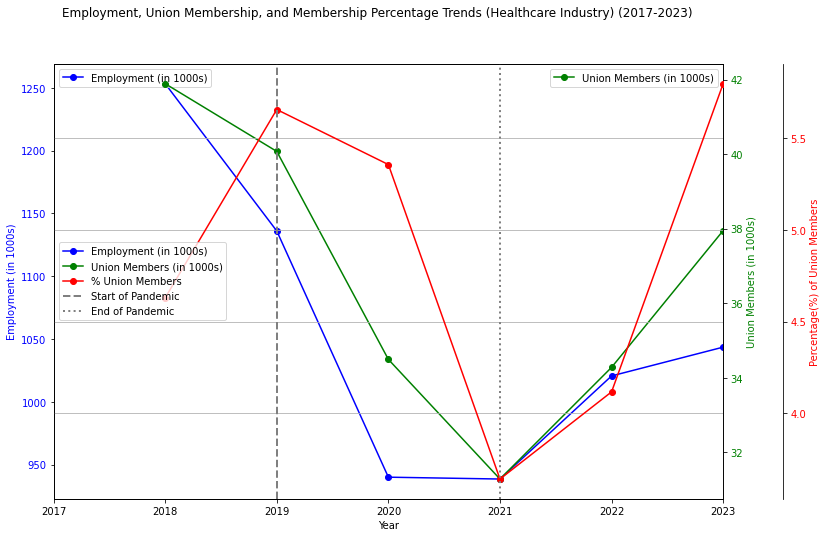

In [21]:
# Aggregate data by year for plotting
yearly_data = healthcare_data_filled_zero.groupby('Year').median(numeric_only=True).reset_index()

# Combined plot for Employment (in 1000s), Members (in 1000s), and % Mem
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Employment (in 1000s) on the first y-axis
ax1.plot(yearly_data['Year'], yearly_data['Employment (in 1000s)'], marker='o', color='b', label='Employment (in 1000s)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Employment (in 1000s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Members (in 1000s)
ax2 = ax1.twinx()
ax2.plot(yearly_data['Year'], yearly_data['Members (in 1000s)'], marker='o', color='g', label='Union Members (in 1000s)')
ax2.set_ylabel('Union Members (in 1000s)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Create a third y-axis for % Mem
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
ax3.plot(yearly_data['Year'], yearly_data['% Mem'], marker='o', color='r', label='% Union Members')
ax3.set_ylabel('Percentage(%) of Union Members', color='r')
ax3.tick_params(axis='y', labelcolor='r')

# Draw vertical lines to indicate pre-, during, and post-pandemic years
plt.axvline(x=2019, color='grey', linestyle='--', lw=2, label='Start of Pandemic')
plt.axvline(x=2021, color='grey', linestyle=':', lw=2, label='End of Pandemic')

# Add title and legends
fig.suptitle('Employment, Union Membership, and Membership Percentage Trends (Healthcare Industry) (2017-2023)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='center right')
plt.xticks(range(2017, 2024))
plt.xlim(2017, 2023)
plt.grid(True)

# Legend for vertical lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines.extend(lines2)
lines.extend(lines3)
labels.extend(labels2)
labels.extend(labels3)
plt.legend(lines, labels, loc='center left')

plt.show()

In [22]:
# Calculating normalizing % of union membership - making data easier to read and analyze to explain decreases in % of union membership
# Total % of union membership / first data point of % of union membership
first_data_point = healthcare_data_filled_zero['% Mem'].iloc[0]
healthcare_data_filled_zero.loc[:, 'Normalized % Mem'] = healthcare_data_filled_zero['% Mem'] / first_data_point
healthcare_data_filled_zero

/tmp/ipykernel_79/1703142182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthcare_data_filled_zero.loc[:, 'Normalized % Mem'] = healthcare_data_filled_zero['% Mem'] / first_data_point


,Year,Industry,Employment (in 1000s),Members (in 1000s),% Mem,Normalized % Mem
227,2018,Offices of physicians,1459.566425,44.713128,3.063453,1.000000
228,2018,Offices of dentists,769.667362,9.320584,1.210989,0.395302
229,2018,Offices of chiropractors,87.802933,0.742270,0.845382,0.275957
230,2018,Offices of optometrists,144.321631,3.322984,2.302485,0.751598
231,2018,Offices of other health practitioners,160.427021,2.754333,1.716876,0.560438
...,...,...,...,...,...,...
237,2023,"Residential care facilities, except skilled nu...",902.501294,32.543026,3.605870,1.177061
238,2023,Individual and family services,1768.593119,167.922159,9.494674,3.099338
239,2023,"Community food and housing, and emergency serv...",160.245287,16.707116,10.425964,3.403338
240,2023,Vocational rehabilitation services,99.763651,4.757232,4.768503,1.556578


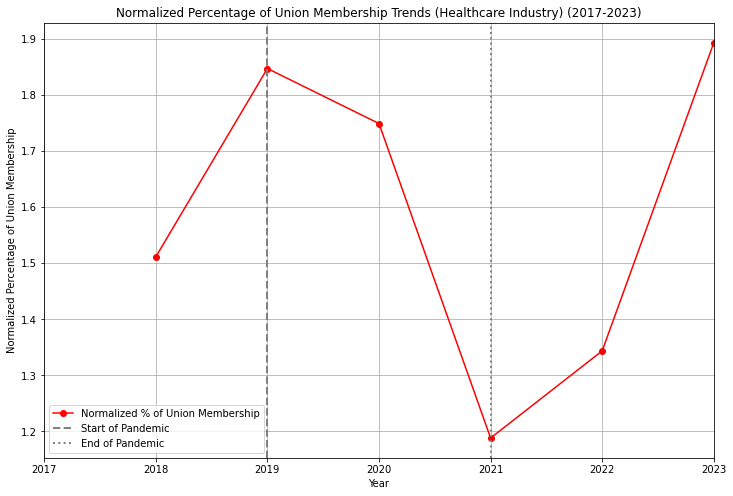

In [23]:
# Aggregate normalized data by year for plotting
yearly_data_normalized = healthcare_data_filled_zero.groupby('Year').median(numeric_only=True).reset_index()

# Plot normalized % of union membership
plt.figure(figsize=(12, 8))
plt.plot(yearly_data_normalized['Year'], yearly_data_normalized['Normalized % Mem'], marker='o', color='r', label='Normalized % of Union Membership')
plt.axvline(x=2019, color='grey', linestyle='--', lw=2, label='Start of Pandemic')
plt.axvline(x=2021, color='grey', linestyle=':', lw=2, label='End of Pandemic')
plt.title('Normalized Percentage of Union Membership Trends (Healthcare Industry) (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Normalized Percentage of Union Membership')
plt.legend()
plt.xticks(range(2017, 2024))
plt.xlim(2017, 2023)
plt.grid(True)
plt.show()

### Line Plot Graph - Employment and Non-Union Membership Trends

/tmp/ipykernel_79/2005598486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthcare_data_filled_zero.loc[:, 'Non-Union Members (in 1000s)'] = healthcare_data_filled_zero['Employment (in 1000s)'] - healthcare_data_filled_zero['Members (in 1000s)']


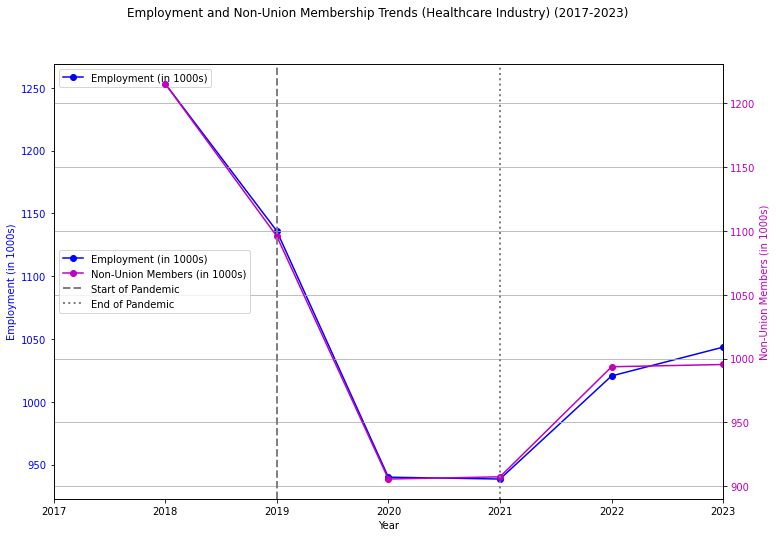

In [24]:
# Line plot 

# Calculate Non-Union Members (in 1000s)
healthcare_data_filled_zero.loc[:, 'Non-Union Members (in 1000s)'] = healthcare_data_filled_zero['Employment (in 1000s)'] - healthcare_data_filled_zero['Members (in 1000s)']

# Aggregate data by year for plotting
yearly_data = healthcare_data_filled_zero.groupby('Year').median(numeric_only=True).reset_index()

# Combined plot for Employment (in 1000s) and Non-Union Members (in 1000s)
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Employment (in 1000s) on the first y-axis
ax1.plot(yearly_data['Year'], yearly_data['Employment (in 1000s)'], marker='o', color='b', label='Employment (in 1000s)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Employment (in 1000s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot Non-Union Members (in 1000s) on the second y-axis
ax2 = ax1.twinx()
ax2.plot(yearly_data['Year'], yearly_data['Non-Union Members (in 1000s)'], marker='o', color='m', label='Non-Union Members (in 1000s)')
ax2.set_ylabel('Non-Union Members (in 1000s)', color='m')
ax2.tick_params(axis='y', labelcolor='m')

# Draw vertical lines to indicate pre-, during, and post-pandemic periods
plt.axvline(x=2019, color='grey', linestyle='--', lw=2, label='Start of Pandemic')
plt.axvline(x=2021, color='grey', linestyle=':', lw=2, label='End of Pandemic')

# Add title and legends
fig.suptitle('Employment and Non-Union Membership Trends (Healthcare Industry) (2017-2023)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(range(2017, 2024))
plt.xlim(2017, 2023)
plt.grid(True)

# Legend for vertical lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines.extend(lines2)
labels.extend(labels2)
plt.legend(lines, labels, loc='center left')

plt.show()